In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter
from sklearn.feature_selection import mutual_info_regression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Poject: <a style="color:purple;">**Macroeconomic Analysis of the US Economy**</a> - Part I

### Author: @**engine**, Date: August 2024

### Abstract:
The purpose of this study is to determine the direction of change in the main macroeconomic indicators of the US economy (fundamental analysis). After finding the basic macroeconomic data, to trace the main trends. On the basis of this information, build a hypothesis and, after a detailed analysis of the movement of the most important macroeconomic data, draw the relevant conclusions.

### 1. **Importance of Economic Indicators**:

Economic indicators are the key statistics that show the direction of an economy. Important economic events determine price movements, so it is important to familiarize yourself with global economic events in order to perform proper <a style="color:purple;">**fundamental analysis**</a> that will enable traders to make informed decisions.

Interpreting and analyzing the indicators is important for all investors as they indicate the overall health of the economy, anticipate its stability and enables investors to respond on time to sudden or unpredictable events, also known as economic shocks. They can also be referred to as a traders 'secret weapon' as they reveal what is to come next, what may be expected of the economy and which direction the markets can take. [1]
Here are some of the most important economic indicators that this study will need:

#### 1.1 **GROSS DOMESTIC PRODUCT (GDP)** - Level of Importance: High

The GDP report is one of the most important of all economic indicators, as it is the biggest measure of the overall state of the economy. It is the total of monetary value of all the goods and service produced by the entire economy during the quarter being measured (does not include international activity).The economic production and growth- what GDP represents, has a large impact on nearly everyone within that economy. For example, when the economy is healthy, what we will typically see is low unemployment and wage increases as businesses demand labor to meet the growing economy. A significant change in GDP, up or down, usually has a significant effect on the market, due to the fact that a bad economy usually means lower earnings for companies, which translates into lower currency and stock prices. Investors really worry about negative GDP growth, which is one of the factors economists use to determine whether an economy is in recession.

#### 1.2 **CONSUMER PRICE INDEX (CPI)** - Level of Importance: High

This report is the most widely used measure of inflation. It measures the change in the cost of a bundle of consumer goods and services from month to month. The base – year market basket of which he CPI is composed of, is derived from detailed expenditure information collected from thousands of families across the U.S. the basket consists of more than 200 categories of goods and services separated into eight groups: food and beverage, housing, apparel, transportation, medical care, recreation, education and communication and other goods and services. The extensive measures taken to formulate a clear picture of changes in the cost of living helps keep financial players to get a sense of inflation, which can destroy an economy if it is not controlled. Movements in the prices of goods and services most directly affect fixed-income securities (an investment that provides a return in the form of fixed periodic payments and the eventual return of principal in maturity). Modest and steady inflation is expected in a growing economy, but if the prices of resources used in production of good and services rise quickly, manufacturers may experience profit declines. On the other hand, deflation can be a negative sign indicating a decline in consumer demand.

The CPI is probably the most important and widely watched economic indicator and it is the best known measure for determining the cost of living changes. It is used to adjust wages, retirement benefits, tax brackets and other important economic indicators. It can tell the investors of what may happen in the financial markets, which share both direct and indirect relationships with consumer prices.

#### 1.3 **CONSUMER CONFIDENCE INDEX (CCI)** - Level of Importance: High

As the name indicates, this indicator measure the consumer confidence. It is defined as the degree of optimism that the consumers have in terms of the state of the economy, which is expresses through consumers saving and spending activity. This economic indicator is released last Tuesday of the month, and it measures how confident people feel about their income stability that has a direct effect on their economic decisions, in other words, their spending activity. For this reason, CCI is seen as a key indicator for the overall shape of the economy.

The measurements are used as an indicative of consumption component level of the gross domestic product and the Federal Reserve looks at CCI when determining interest rate changes.

#### 1.4 **INTEREST RATES** - Level of Importance: High

Interest rates are the major drivers of the forex market and all the above mentioned economic indicators are closely watched by the Federal Open Market Committee in order to determine the overall health of the economy. The FED can decide accordingly if they will lower, rise or leave the interest rates unchanged, all depending on the evidence gathered on the health of the economy. The existence of interest rates allows borrowers to spend money immediately instead of waiting to save the money to make a purchase. The lower the interest rate, the more willing people are to borrow money to make big purchases, such as houses or cars. When consumers pay less in interest, this gives them more money to spend which can create a ripple effect of increased spending throughout the economy. On the other hand, higher interest rates mean that consumers do not have as much disposable income and must cut back on spending. When higher interest rate are combined with increased lending standards, banks make fewer loans. This affects the consumers, businesses and farmers who will cut back on spending for new equipment, thus slowing the productivity or reducing the number of employees. Whenever interest rates are rising or falling, we hear about the federal funds rate (the rate banks use to lend each other money). The changes in the interest rates can affect both inflation and recession. Inflation refers to the rise in the price of goods and services over time, as a result of a strong and healthy economy. However, if inflation is left unchecked, it can lead to a significant loss of purchasing power. As can be seen, interest rates affect the economy by influencing consumer and business spending, inflation and recessions.

#### 1.5 **TRADE BALANCE** - Level of Importance: Medium

The Trade Balance is the difference between imports and exports of a given country for a given time period. It is used by economists as a statistical tool, as it enables them to understand the relative strength of a country’s economy compared to other countries’ economies and the flow of trade between nations.

Trade surpluses are desirable, where a positive value means that the exports are greater that imports; while on the other hand, trade deficits can lead towards a significant domestic debt. The index is published monthly.

### 2. **Macroeconomic Data for the US Economy**.

#### 2.1 Criteria according to which the data for the present study were collected.

The time from <a style="color:purple;">**July 2022 to June 2024**</a> was taken as the **base period of <a style="color:purple;">2 years</a> for data collection**. This is because the global economy as a whole during the period of COVID-19 operates on a non-market basis. From 2020 to the spring of 2022, many businesses and commercial establishments were closed - directly by regulations or indirectly (through restrictions imposed by health authorities). Billions of dollars and euros were poured into the economies of the world without cover. This resulted in a vicious combination of a closed economy and inflation.

If one traces the graph of the main world economic indicators, then for the period from 2020 to 2022 one will see an anomaly that would make any analysis very difficult and lead to wrong conclusions. Here is an example of such an anomaly [2]:

<a href="https://www.statista.com/statistics/256598/global-inflation-rate-compared-to-previous-year/" rel="nofollow"><img src="https://www.statista.com/graphic/1/256598/global-inflation-rate-compared-to-previous-year.jpg" alt="Statistic: Global inflation rate from 2000 to 2022, with forecasts until 2028 (percent change from previous year) | Statista" style="width: 100%; height: auto !important; max-width:1000px;-ms-interpolation-mode: bicubic;"/></a>

For this reason, historical data of the main indicators is not taken, but **only the past period of 2 years is used**.
Data on prices of precious and industrial metals, energy carriers will also be included to help the analysis. Much of the macroeconomic data comes out with a long time lag. Not all information will be possible to collect in the desired volume. However, the amount of data collected should be sufficient for analysis and subsequent conclusions about the development of the US economy in the future.

#### 2.2 GROSS DOMESTIC PRODUCT (GDP)

From this site **[FEDERAL RESERVE BANK of ST. LOUIS](https://fred.stlouisfed.org/series/GDP)** we only download information for the period of our study: **Gross Domestic Product (GDP)**. [3]
Units: <a style="color:purple;">**Billions of Dollars**</a>, Seasonally Adjusted Annual Rate.
Frequency: Quarterly.

In [5]:
gdp = pd.read_csv('data/GDP.csv') # Read the CSV file.
gdp.columns = ["date", "gdp"]
gdp['gdp'] = gdp['gdp'] * 1_000_000_000 # Convert to dollars.
gdp
# Show all data: _______ DataFrame (DF) with real data! _______

,date,gdp
0,2022-07-01,2.599464e+13
1,2022-10-01,2.640840e+13
2,2023-01-01,2.681360e+13
3,2023-04-01,2.706301e+13
4,2023-07-01,2.761013e+13
5,2023-10-01,2.795700e+13
6,2024-01-01,2.826917e+13
7,2024-04-01,2.862915e+13


In [6]:
gdp.describe().T

,count,mean,std,min,25%,50%,75%,max
gdp,8.0,2.734314e+13,9.266329e+11,2.599464e+13,2.671230e+13,2.733657e+13,2.803504e+13,2.862915e+13


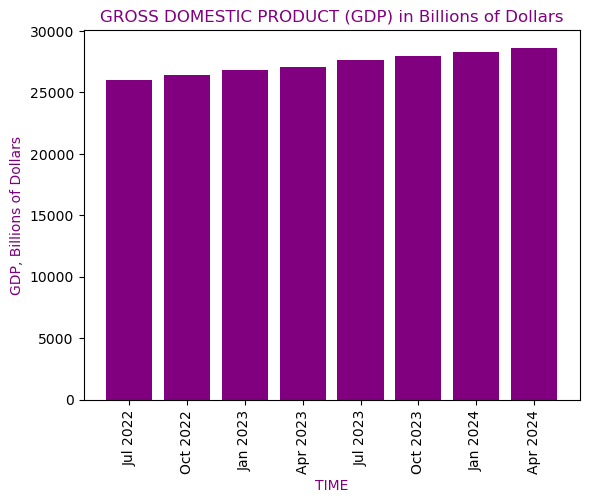

In [7]:
gdp_for_table = gdp.copy() # A copy of the table in order to correctly represent the data.

# Split the date into day, month, and year.
gdp_for_table['year'] = pd.to_datetime(gdp_for_table['date']).dt.year
gdp_for_table['month'] = pd.to_datetime(gdp_for_table['date']).dt.month

# Create custom labels with just month and year.
date_labels = gdp_for_table['date'].apply(lambda x: f"{pd.to_datetime(x).strftime('%b %Y')}")

# Convert to Billions of Dollars.
gdp_for_table['gdp'] = gdp_for_table['gdp'] / 1_000_000_000

plt.bar(gdp_for_table.index, gdp_for_table['gdp'], color = "purple")
# Display month and year as vertical labels.
plt.xticks(gdp_for_table.index, date_labels, rotation = 90)
plt.title("GROSS DOMESTIC PRODUCT (GDP) in Billions of Dollars", color = "purple")
plt.xlabel("TIME", color = "purple")
plt.ylabel("GDP, Billions of Dollars", color = "purple")
plt.show()

Data for the period under study are given by **quartals**, not by months. To obtain the requested data from **July 2022** to **June 2024**, we use a **linear approximation**.

In [9]:
gdp['date'] = pd.to_datetime(gdp['date'])
gdp_approx = gdp.copy()

# Create a new DataFrame with all dates from 2022-07-01 to 2024-06-01.
all_dates = pd.date_range(start='2022-07-01', end='2024-06-01', freq='MS')
gdp_all_dates = pd.DataFrame({'date': all_dates})

# Merge the two DataFrames and interpolate.
gdp_approx = pd.merge(gdp_all_dates, gdp, on='date', how='left')

# Linear interpolation.
gdp_approx['gdp'] = gdp_approx['gdp'].interpolate(method='linear')

# Remove the 'year' and 'month' columns.
if 'year' in gdp_approx.columns:
    gdp_approx = gdp_approx.drop(columns=['year'])
if 'month' in gdp_approx.columns:
    gdp_approx = gdp_approx.drop(columns=['month'])

gdp_approx.head() # Show first rows only...

,date,gdp
0,2022-07-01,2.599464e+13
1,2022-08-01,2.613256e+13
2,2022-09-01,2.627048e+13
3,2022-10-01,2.640840e+13
4,2022-11-01,2.654347e+13


#### 2.3 CONSUMER PRICE INDEX (CPI)

From this site **[FEDERAL RESERVE BANK of ST. LOUIS](https://fred.stlouisfed.org/series/CPIAUCSL)** we only download information for the period of our study:
**Consumer Price Index (CPI)** for All Urban Consumers, All Items in U.S. City Average (CPIAUCSL). [4]

In [11]:
cpi = pd.read_csv('data/Consumer Price Index.csv') # Read the CSV file.
cpi.columns = ["date", "cpi"]
cpi.head() # Show first rows only...

,date,cpi
0,2022-07-01,294.977
1,2022-08-01,295.209
2,2022-09-01,296.341
3,2022-10-01,297.863
4,2022-11-01,298.648


In [12]:
cpi[['cpi']].describe().T # Returns statistical description of the data in the DataFrame.

,count,mean,std,min,25%,50%,75%,max
cpi,24.0,304.612875,5.883572,294.977,299.97,304.3155,308.97775,313.225


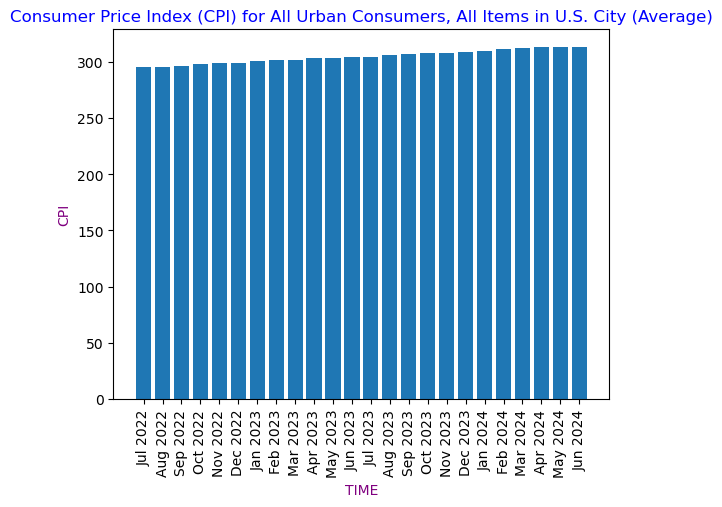

In [13]:
# Split the date into day, month, and year.
cpi['year'] = pd.to_datetime(cpi['date']).dt.year
cpi['month'] = pd.to_datetime(cpi['date']).dt.month

# Create custom labels with just month and year.
date_labels = cpi['date'].apply(lambda x: f"{pd.to_datetime(x).strftime('%b %Y')}")

plt.bar(cpi.index, cpi['cpi'])
plt.xticks(cpi.index, date_labels, rotation = 90) # Display month and year as vertical labels.
plt.title("Consumer Price Index (CPI) for All Urban Consumers, All Items in U.S. City (Average)", color = "blue")
plt.xlabel("TIME", color = "purple")
plt.ylabel("CPI", color = "purple")
plt.show()

#### 2.4 CONSUMER CONFIDENCE INDEX (CCI)

From this site **[MacroVar](https://macrovar.com/united-states/consumer-confidence-index/)** we download information: **CONSUMER CONFIDENCE INDEX (CCI)**, United States Conference Board Consumer Confidence Analytics & Data. [5]
Since the data is from 2014, we filter only those that are for our studied period.

In [15]:
cci = pd.read_csv('data/CCI.csv') # Read the CSV file.
cci.columns = ["date", "cci"]
# Convert the "date" column to datetime format.
cci['date'] = pd.to_datetime(cci['date'])
# Filter the data for the period from 2022 to 2024.
filtered_cci = cci[(cci['date'] >= '2022-07-01') & (cci['date'] <= '2024-06-30')]
del cci
filtered_cci = filtered_cci.reset_index(drop=True)
filtered_cci.head() # Show first rows only...

,date,cci
0,2022-07-31,95.3
1,2022-08-31,103.6
2,2022-09-30,107.8
3,2022-10-31,102.5
4,2022-11-30,101.4


In [16]:
filtered_cci[['cci']].describe().T # .T only for DataFrame, not for Series.

,count,mean,std,min,25%,50%,75%,max
cci,24.0,104.170833,4.671977,95.3,101.375,103.5,107.925,114.0


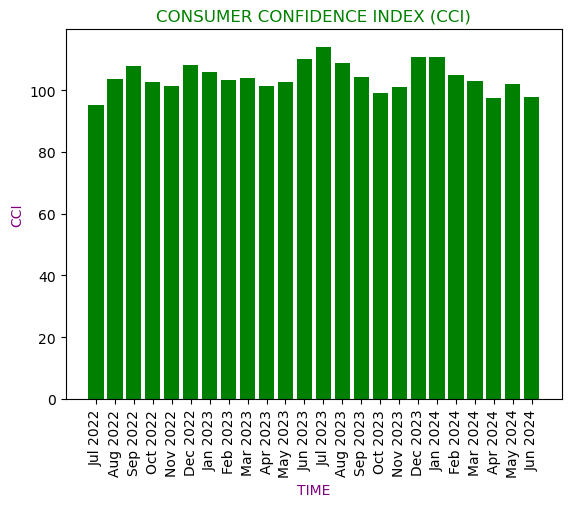

In [17]:
# Split the date into day, month, creating new columns in the DataFrame.
filtered_cci = filtered_cci.assign(year=pd.to_datetime(filtered_cci['date']).dt.year)
filtered_cci = filtered_cci.assign(month=pd.to_datetime(filtered_cci['date']).dt.month)

# Create custom labels with just month and year.
date_labels = filtered_cci['date'].apply(lambda x: f"{pd.to_datetime(x).strftime('%b %Y')}")

plt.bar(filtered_cci.index, filtered_cci['cci'], color = "green")
plt.xticks(filtered_cci.index, date_labels, rotation=90)  # Display month and year as vertical labels.
plt.title("CONSUMER CONFIDENCE INDEX (CCI)", color = "green")
plt.xlabel("TIME", color="purple")
plt.ylabel("CCI", color="purple")
plt.show()

#### 2.5 INTEREST RATES

From this site **[FEDERAL RESERVE BANK of ST. LOUIS](https://fred.stlouisfed.org/series/FEDFUNDS)** we only download information for the period of our study: **Federal Funds Effective Rate (FEDFUNDS)**. [6] The federal funds rate is the interest rate at which depository institutions trade federal funds (balances held at Federal Reserve Banks) with each other overnight. When a depository institution has surplus balances in its reserve account, it lends to other banks in need of larger balances. In simpler terms, a bank with excess cash, which is often referred to as liquidity, will lend to another bank that needs to quickly raise liquidity.
 1. The rate that the borrowing institution pays to the lending institution is determined between the two banks; the weighted average rate for all of these types of negotiations is called the effective federal funds rate.
 2. The effective federal funds rate is essentially determined by the market but is influenced by the Federal Reserve through open market operations to reach the federal funds rate target.

The Federal Open Market Committee (FOMC) meets eight times a year to determine the federal funds target rate. As previously stated, this rate influences the effective federal funds rate through open market operations or by buying and selling of government bonds (government debt).

In [19]:
fed_funds = pd.read_csv('data/FEDFUNDS.csv') # Read the CSV file.
fed_funds.columns = ["date", "fed_funds"]
fed_funds.head()
# ____ Display data in percentages!! _________ Show first rows only...

,date,fed_funds
0,2022-07-01,1.68
1,2022-08-01,2.33
2,2022-09-01,2.56
3,2022-10-01,3.08
4,2022-11-01,3.78


In [20]:
fed_funds.describe().T

,count,mean,std,min,25%,50%,75%,max
fed_funds,24.0,4.575,1.098659,1.68,4.2725,5.1,5.33,5.33


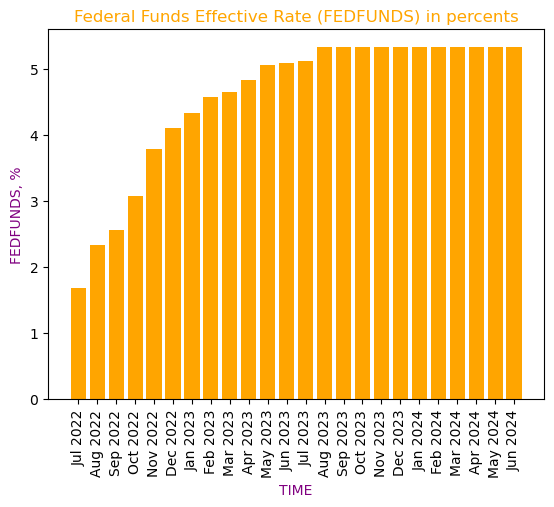

In [21]:
# Split the date into day, month, and year.
fed_funds['year'] = pd.to_datetime(cpi['date']).dt.year
fed_funds['month'] = pd.to_datetime(cpi['date']).dt.month

# Create custom labels with just month and year.
date_labels = fed_funds['date'].apply(lambda x: f"{pd.to_datetime(x).strftime('%b %Y')}")

plt.bar(fed_funds.index, fed_funds['fed_funds'], color = "orange")
plt.xticks(fed_funds.index, date_labels, rotation = 90) # Display month and year as vertical labels.
plt.title("Federal Funds Effective Rate (FEDFUNDS) in percents", color = "orange")
plt.xlabel("TIME", color = "purple")
plt.ylabel("FEDFUNDS, %", color = "purple")
plt.show()

#### 2.6 TRADE BALANCE

From this site **[FEDERAL RESERVE BANK of ST. LOUIS](https://fred.stlouisfed.org/series/BOPGTB)** we only download information for the period of our study:
**Trade Balance: Goods, Balance of Payments Basis (BOPGTB)**,
Units: <a style="color:purple;">**Millions of Dollars**</a>, Seasonally Adjusted. [7]

In [23]:
tb = pd.read_csv('data/BOPGTB.csv') # Read the CSV file.
tb.columns = ["date", "trade_balance"]

tb['trade_balance'] = tb['trade_balance'] * 1_000_000 # Convert to dollars!!
tb.head()
# __________ DF with real data! __________ Show first rows only...

,date,trade_balance
0,2022-07-01,-8.923600e+10
1,2022-08-01,-8.678200e+10
2,2022-09-01,-9.001500e+10
3,2022-10-01,-9.614500e+10
4,2022-11-01,-8.397500e+10


In [24]:
tb.describe().T

,count,mean,std,min,25%,50%,75%,max
trade_balance,24.0,-9.068129e+10,4.670357e+09,-9.984300e+10,-9.322400e+10,-8.990900e+10,-8.821825e+10,-8.314900e+10


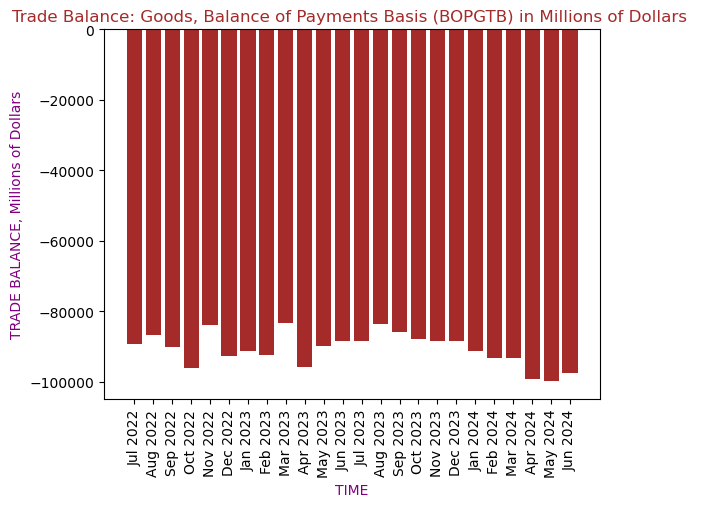

In [25]:
tb_for_table = tb.copy() # A copy of the table in order to correctly represent the data.

# To convert to millions of dollars!!
tb_for_table['trade_balance'] = tb_for_table['trade_balance'] / 1_000_000

# Split the date into day, month, and year.
tb_for_table['year'] = pd.to_datetime(tb_for_table['date']).dt.year
tb_for_table['month'] = pd.to_datetime(tb_for_table['date']).dt.month

# Create custom labels with just month and year.
date_labels = tb['date'].apply(lambda x: f"{pd.to_datetime(x).strftime('%b %Y')}")

plt.bar(tb_for_table.index, tb_for_table['trade_balance'], color = "brown")
plt.xticks(tb_for_table.index, date_labels, rotation = 90) # Display month and year as vertical labels.
plt.title("Trade Balance: Goods, Balance of Payments Basis (BOPGTB) in Millions of Dollars ", color = "brown")
plt.xlabel("TIME", color = "purple")
plt.ylabel("TRADE BALANCE, Millions of Dollars", color = "purple")
plt.show()

#### 2.7 US DEBT

From this site **[FiscalData](https://fiscaldata.treasury.gov/datasets/monthly-statement-public-debt/summary-of-treasury-securities-outstanding)** we download information: **U.S. Treasury Monthly Statement of the Public Debt (MSPD)**, Date Range (Record Date): 5 Years. <a style="color:purple;">**Debt in Millions of Dollars!**</a> [8]

The U.S. Treasury Monthly Statement of the Public Debt (MSPD) dataset details the Treasury's outstanding debts and the statutory debt limit. Debt is categorized by whether it is marketable or non-marketable and whether it is debt held by the public or debt held by government agencies. All amounts are reported in millions of U.S. dollars. Data is published on the fourth business day of each month, detailing the debt as of the end of the previous month.

In [27]:
# Read the dataset using the compression zip.
debt = pd.read_csv('data/MSPD_SumSecty.zip',compression='zip')

# We leave only the requested columns...
keep_col = ['Record Date', 'Security Type Description', 'Total Public Debt Outstanding (in Millions)']
debt_filtered = debt[keep_col]

# We leave only the requested dates...
debt_filtered = debt_filtered[(debt_filtered['Record Date'] >= '2022-07-01') & (debt_filtered['Record Date'] <= '2024-06-31')]

# selecting rows based on condition.
debt_filtered = debt_filtered.loc[debt_filtered['Security Type Description'] == 'Total Public Debt Outstanding']

# Rename columns.
debt_filtered.columns = ["date", "type", 'total_debt']

debt_filtered.head() # Show first rows only...

,date,type,total_debt
13,2024-06-30,Total Public Debt Outstanding,3.483163e+07
27,2024-05-31,Total Public Debt Outstanding,3.466712e+07
41,2024-04-30,Total Public Debt Outstanding,3.461699e+07
55,2024-03-31,Total Public Debt Outstanding,3.458653e+07
69,2024-02-29,Total Public Debt Outstanding,3.447108e+07


In [28]:
del debt # Drop debt table to free memory.
debt_filtered['total_debt'].dtype # float64 is the required data type to hold such large numbers.
# No need to change the data type.

dtype('float64')

In [29]:
# Create DataFrame.
debt_real = pd.DataFrame(debt_filtered)

# Convert date column to datetime type.
debt_real['date'] = pd.to_datetime(debt_real['date'])

# Sort a DataFrame by date in descending order.
debt_real = debt_real.sort_values(by='date', ascending=True)

# Reindex the DataFrame.
debt_real.reset_index(drop=True, inplace=True)

# Convert millions of dollars to dollars!
debt_real['total_debt'] = debt_real['total_debt'] * 1_000_000

debt_real.head()
# __________ DF with real data! __________ Show first rows only...

,date,type,total_debt
0,2022-07-31,Total Public Debt Outstanding,3.059511e+13
1,2022-08-31,Total Public Debt Outstanding,3.093608e+13
2,2022-09-30,Total Public Debt Outstanding,3.092891e+13
3,2022-10-31,Total Public Debt Outstanding,3.123830e+13
4,2022-11-30,Total Public Debt Outstanding,3.141332e+13


In [30]:
debt_real[['total_debt']].describe().T

,count,mean,std,min,25%,50%,75%,max
total_debt,24.0,3.265804e+13,1.463557e+12,3.059511e+13,3.144616e+13,3.247043e+13,3.404891e+13,3.483163e+13


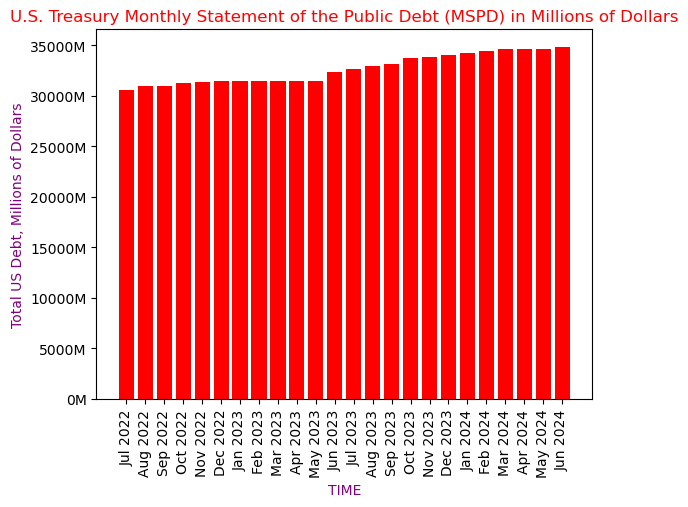

In [31]:
debt_for_table = debt_real.copy() # A copy of the table in order to correctly represent the data.

# Formatting the Y-axis for a million dollar scale.
def millions(x, pos):
    'The two args are the value and tick position'
    return '%.0fM' % (x * 1e-6)
formatter = FuncFormatter(millions)
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
debt_for_table['total_debt'] = debt_real['total_debt'] / 1000

# Split the date into day, month, and year.
debt_for_table['year'] = pd.to_datetime(debt_for_table['date']).dt.year
debt_for_table['month'] = pd.to_datetime(debt_for_table['date']).dt.month

# Create custom labels with just month and year.
date_labels = debt_for_table['date'].apply(lambda x: f"{pd.to_datetime(x).strftime('%b %Y')}")

plt.bar(debt_for_table.index, debt_for_table['total_debt'], color = "red")
plt.xticks(debt_for_table.index, date_labels, rotation = 90) # Display month and year as vertical labels.
plt.title("U.S. Treasury Monthly Statement of the Public Debt (MSPD) in Millions of Dollars", color = "red")
plt.xlabel("TIME", color = "purple")
plt.ylabel("Total US Debt, Millions of Dollars", color = "purple")
plt.show()

# 3.466712e+07 in Millions of Dollars => 3.466712e+13 => 34.66712e+12 =>
# 34.66712 trillions USD => 34 667.12 millions USD

#### 2.8 UNEMPLOYMENT

From this site **[FEDERAL RESERVE BANK of ST. LOUIS](https://fred.stlouisfed.org/series/LRHUTTTTUSM156S)** we only download information for the period of our study:  Infra-Annual Labor Statistics: **Monthly Unemployment Rate**. [9] Units: <a style="color:purple;">**Percent**</a>, Seasonally Adjusted. Frequency: Monthly. 

In [33]:
unemployment = pd.read_csv('data/LRHUTTTTUSM.csv')
unemployment.columns = ["date", "unemployment"]
unemployment.head()
# ____ Display data in percentages!! ______ Show first rows only...

,date,unemployment
0,2022-07-01,3.5
1,2022-08-01,3.6
2,2022-09-01,3.5
3,2022-10-01,3.6
4,2022-11-01,3.6


In [34]:
unemployment.describe().T

,count,mean,std,min,25%,50%,75%,max
unemployment,24.0,3.675,0.184744,3.4,3.5,3.65,3.8,4.1


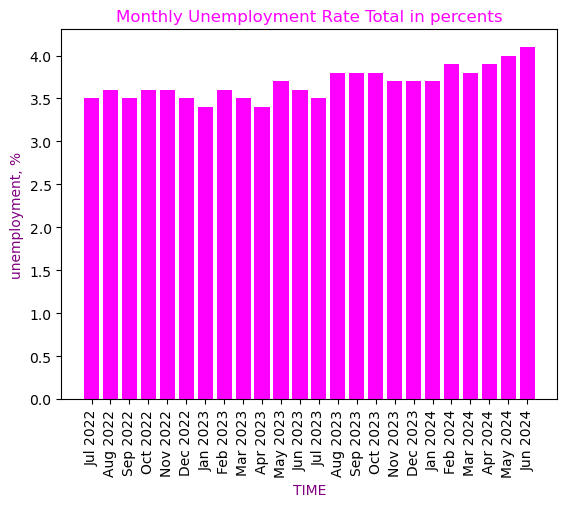

In [35]:
# Split the date into day, month, and year.
unemployment['year'] = pd.to_datetime(unemployment['date']).dt.year
unemployment['month'] = pd.to_datetime(unemployment['date']).dt.month

# Create custom labels with just month and year.
date_labels = unemployment['date'].apply(lambda x: f"{pd.to_datetime(x).strftime('%b %Y')}")

plt.bar(unemployment.index, unemployment['unemployment'], color = "magenta")
plt.xticks(unemployment.index, date_labels, rotation = 90) # Display month and year as vertical labels.
plt.title("Monthly Unemployment Rate Total in percents", color = "magenta")
plt.xlabel("TIME", color = "purple")
plt.ylabel("unemployment, %", color = "purple")
plt.show()

#### 2.9 OTHER ECONOMIC INDICATORS

From this site: **[FiscalData](https://fiscaldata.treasury.gov/datasets/u-s-government-financial-report/statements-of-net-cost)**, we pull the **US budget data** for the last few years **by spending categories** [10]. Already on the site, we filter the requested information, and then **only 2023 and 2023** will be taken. This is because the budget year in the USA starts in September, and the data on its implementation comes out with a big delay. Monitoring the implementation of the budget by month would not give much result.

In [37]:
# Read the dataset using the compression zip.
budget = pd.read_csv('data/USFR_StmtNetCost.zip', compression='zip')

budget.head() # Show first rows only...

,Record Date,Statement Fiscal Year,Agency Name,Net Cost (in Billions),Source Line Number,Fiscal Year
0,2023-09-30,2023,Department of Health and Human Services,1714.1,1,2023
1,2023-09-30,2023,Department of Veterans Affairs,1455.3,2,2023
2,2023-09-30,2023,Social Security Administration,1432.8,3,2023
3,2023-09-30,2023,Department of Defense,1003.3,4,2023
4,2023-09-30,2023,Interest on Treasury Securities held by the pu...,678.0,5,2023


In [38]:
# Keep only the required columns.
keep_col = ['Statement Fiscal Year', 'Agency Name', 'Net Cost (in Billions)', 'Fiscal Year']
budget_filtered = budget[keep_col]

# Renaming columns.
budget_filtered.columns = ['statement_date', 'agency', 'net_cost', 'date']

# Convert values ​​to dollars.
budget_filtered.loc[:, 'net_cost'] = budget_filtered['net_cost'] * 1_000_000_000

In [39]:
budget_filtered.dtypes

statement_date      int64
agency             object
net_cost          float64
date                int64
dtype: object

In [40]:
# Filter by year (2022 or 2023).
filtered_by_year = budget_filtered[(budget_filtered['date'] == 2022) | (budget_filtered['date'] == 2023)]

# Filter by matching year in 'date' and 'statement_date'.
filtered_by_date_match = filtered_by_year[filtered_by_year['statement_date'] == filtered_by_year['date']]

# 'budget_filtered' will now contain only rows that meet both conditions.
budget_filtered = filtered_by_date_match

# Remove empty lines and duplicate lines.
cleaned_data = budget_filtered.dropna()
cleaned_data = cleaned_data.drop_duplicates()

# Remove rows with "Total" and "Subtotal" in 'agency'.
cleaned_data = cleaned_data[~cleaned_data['agency'].isin(['Total', 'Subtotal'])]

# Remove columns with missing data.
cleaned_data = cleaned_data.dropna(axis=1, how='any')
budget_filtered = cleaned_data # Update!

budget_filtered

,statement_date,agency,net_cost,date
0,2023,Department of Health and Human Services,1.714100e+12,2023
1,2023,Department of Veterans Affairs,1.455300e+12,2023
2,2023,Social Security Administration,1.432800e+12,2023
3,2023,Department of Defense,1.003300e+12,2023
4,2023,Interest on Treasury Securities held by the pu...,6.780000e+11,2023
...,...,...,...,...
122,2022,Farm Credit System Insurance Corporation,-6.000000e+08,2022
123,2022,Tennessee Valley Authority,-1.100000e+09,2022
124,2022,Federal Deposit Insurance Corporation,-6.300000e+09,2022
125,2022,Pension Benefit Guaranty Corporation,-7.000000e+09,2022


In [41]:
# Calculation of the total net_cost for each category in the agency.
sum_net_cost = budget_filtered.groupby('agency')['net_cost'].sum()

# Selecting the first 5 categories with the largest net_cost.
top_5_agencies = sum_net_cost.nlargest(5).index

# Filter the data for these 5 categories.
top_5_data = budget_filtered[budget_filtered['agency'].isin(top_5_agencies)]

# Grouping and calculating the descriptive statistics for the net_cost column for the top 5 categories.
desc_stats = top_5_data.groupby('agency')['net_cost'].describe()

# Show only the top 5 agencies with the highest net_cost.
desc_stats_top_5 = desc_stats.nlargest(5, 'mean')
desc_stats_top_5

,count,mean,std,min,25%,50%,75%,max
agency,,,,,,,,
Department of Veterans Affairs,2.0,1.695100e+12,3.391284e+11,1.455300e+12,1.575200e+12,1.695100e+12,1.815000e+12,1.934900e+12
Department of Health and Human Services,2.0,1.687050e+12,3.825448e+10,1.660000e+12,1.673525e+12,1.687050e+12,1.700575e+12,1.714100e+12
Social Security Administration,2.0,1.363450e+12,9.807571e+10,1.294100e+12,1.328775e+12,1.363450e+12,1.398125e+12,1.432800e+12
Department of Defense,2.0,1.231150e+12,3.222286e+11,1.003300e+12,1.117225e+12,1.231150e+12,1.345075e+12,1.459000e+12
Interest on Treasury Securities held by the public,2.0,5.872500e+11,1.283399e+11,4.965000e+11,5.418750e+11,5.872500e+11,6.326250e+11,6.780000e+11


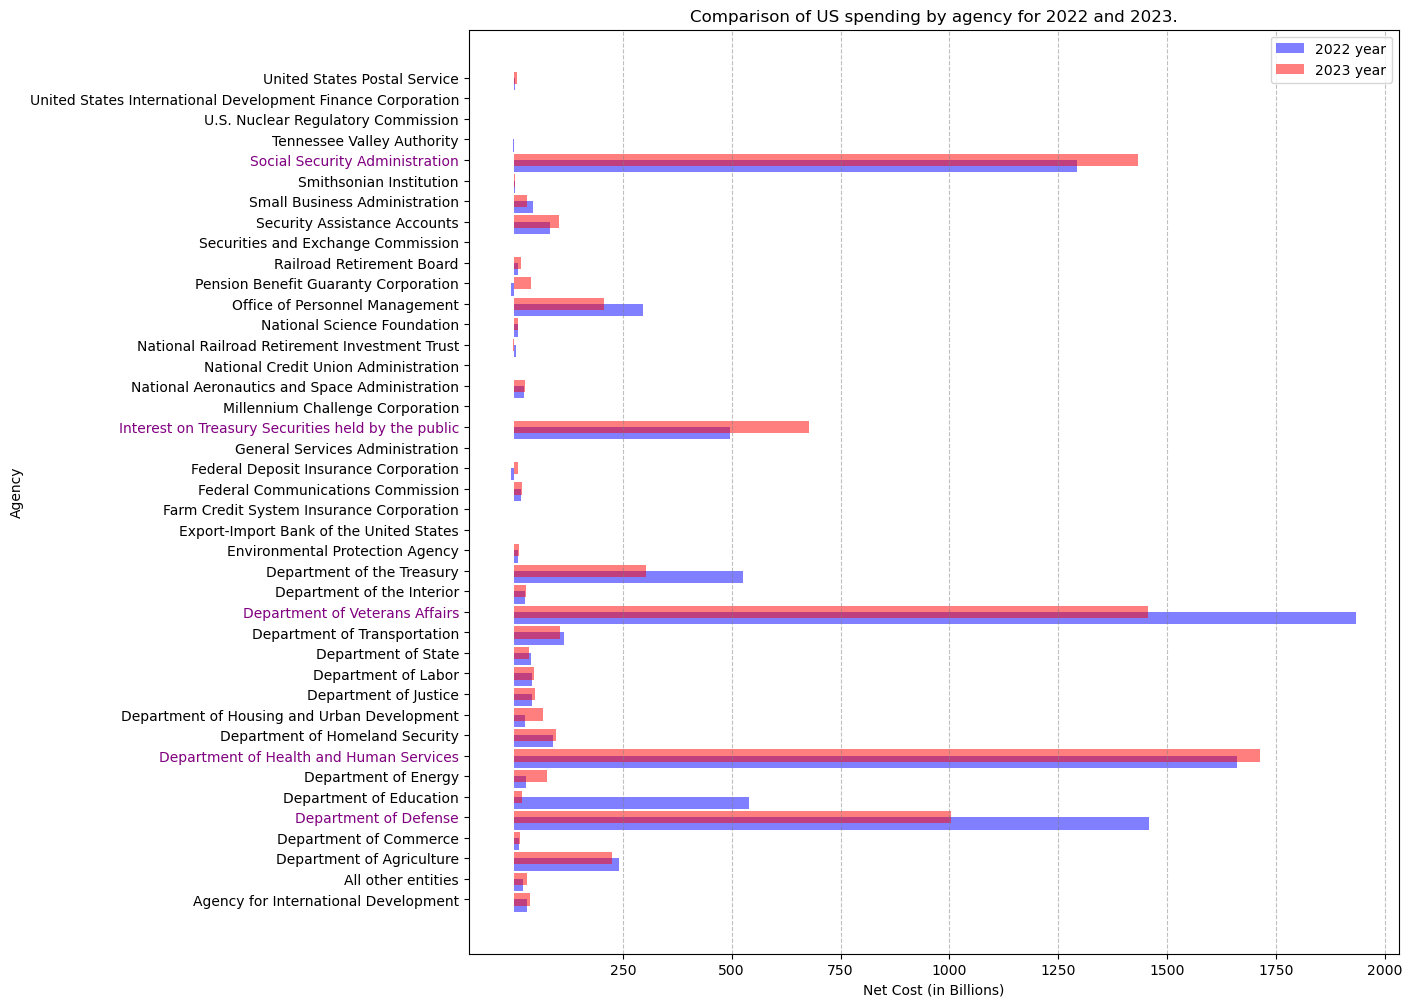

In [42]:
# Filter data for 2022 and calculate sum net_cost for each agency.
sum_net_cost_2022 = budget_filtered[budget_filtered['date'] == 2022].groupby('agency')['net_cost'].sum()

# Filter data for 2023 and calculate sum net_cost for each agency.
sum_net_cost_2023 = budget_filtered[budget_filtered['date'] == 2023].groupby('agency')['net_cost'].sum()

# Create a horizontal bar plot.
plt.figure(figsize=(12, 12))

bar_width = 0.6  # Adjust the width of the bars.
bar_positions_2022 = np.arange(len(sum_net_cost_2022))
bar_positions_2023 = np.arange(len(sum_net_cost_2023)) + (bar_width / 2)

plt.barh(bar_positions_2022, sum_net_cost_2022.values / 1_000_000_000, bar_width, color='b', alpha=0.5, label='2022 year')
plt.barh(bar_positions_2023, sum_net_cost_2023.values / 1_000_000_000, bar_width, color='r', alpha=0.5, label='2023 year')

plt.xlabel('Net Cost (in Billions)')
plt.ylabel('Agency')
plt.title('Comparison of US spending by agency for 2022 and 2023.')

plt.yticks(bar_positions_2022 + bar_width / 2, sum_net_cost_2022.index)
plt.xticks([0, 250, 500, 750, 1000, 1250])

plt.xticks([250, 500, 750, 1000, 1250, 1500, 1750, 2000])  # Set the X axis readings.
plt.grid(axis='x', alpha=0.5, color='gray', linestyle='--')  # Add the vertical gray lines.

for label in plt.gca().get_yticklabels(): # Coloring the text of the top 5 categories.
    if label.get_text() == 'Department of Defense':
        label.set_color('purple')
    elif label.get_text() == 'Department of Veterans Affairs':
        label.set_color('purple')
    elif label.get_text() == 'Social Security Administration':
        label.set_color('purple')
    elif label.get_text() == 'Department of Health and Human Services':
        label.set_color('purple')
    elif label.get_text() == 'Interest on Treasury Securities held by the public':
        label.set_color('purple')

plt.legend()
plt.show()

In [43]:
# Total for the entire year 2023.
total_budget_2023 = sum_net_cost_2023.sum()

# Calculation of the percentage share of the departments.
agencies_of_interest = [
    'Department of Defense',
    'Department of Veterans Affairs',
    'Interest on Treasury Securities held by the public', 
    'National Science Foundation',
    'Department of Transportation', 
    'Department of Education',
    'Department of Energy'
]
# Calculation:
percentages = {}
for agency in agencies_of_interest:
    if agency in sum_net_cost_2023:
        percentages[agency] = (sum_net_cost_2023[agency] / total_budget_2023) * 100
    else:
        percentages[agency] = 0

# Print results with spaces.
def format_number(number):
    return f"{number:,.2f}".replace(",", " ")

def bold_text(text):
    return f"\033[1m{text}\033[0m"

print(bold_text(f"Total spending for 2023: ${format_number(total_budget_2023)}"))
print("Percentages of the total spending for 2023:")
for agency, percentage in percentages.items():
    print(f"{agency}: {percentage:.2f}%")

Total spending for 2023: $7 882 800 000 000.00
Percentages of the total spending for 2023:
Department of Defense: 12.73%
Department of Veterans Affairs: 18.46%
Interest on Treasury Securities held by the public: 8.60%
National Science Foundation: 0.11%
Department of Transportation: 1.35%
Department of Education: 0.23%
Department of Energy: 0.95%


#### 2.10 PRICES OF PRECIOUS METALS

In this study, we will also see the price movement of precious metals. They have proven themselves over the millennia as "independent money", material labour. They cannot be falsified in the general case, they cannot be printed, they cannot be created with a few clicks on a computer keyboard. When they are mined, it is not according to cleverly invented algorithms, but actually from the ground to the finished product they travel a long way, which involves a lot of work and energy. Here we will look at 3 precious metals:

- **Gold** as a symbol of millennial **world money**.
- **Platinum** as world money, but also as an **industrial metal**.

With these metals we will also compare the economic indicators of the USA, because of their quality as real money and raw material for many industrial productions. <br>From this site **[investing.com](https://www.investing.com/currencies/xau-usd-historical-data)** we only download information for the period of our study: **XAU/USD - Gold Spot US Dollar**. [11] That is, we have the price of 24 karat gold per troy ounce in dollars. From the same site **[investing.com](https://www.investing.com/currencies/xpt-usd-historical-data)**, we also download the monthly platinum prices for the time interval we are looking for: **XPT/USD Historical Data** [12]

In [45]:
# Loading GOLD data for 2022 and 2024.
xau = pd.read_csv('data/XAU_USD_Historical_Data.csv')
# We leave only the requested columns...
keep_col = ['Date', 'Price']
xau_filtered = xau[keep_col]
del xau
# Rename columns.
xau_filtered.columns = ['date', 'xau_price']

# We remove the commas and convert to numeric type.
xau_filtered['xau_price'] = xau_filtered['xau_price'].str.replace(',', '').astype(float)

xau_filtered.head() # We show the first few lines for verification!

,date,xau_price
0,06/01/2024,2324.98
1,05/01/2024,2326.97
2,04/01/2024,2284.57
3,03/01/2024,2232.38
4,02/01/2024,2043.24


In [46]:
xau_filtered[['xau_price']].describe().T # GOLD

,count,mean,std,min,25%,50%,75%,max
xau_price,24.0,1959.966667,193.751874,1633.12,1826.4625,1963.245,2038.7025,2326.97


In [47]:
# Loading PLATINUM data for 2022 and 2024.
xpt = pd.read_csv('data/XPT_USD_Historical_Data.csv')
# We leave only the requested columns...
keep_col = ['Date', 'Price']
xpt_filtered = xpt[keep_col]
del xpt
# Rename columns.
xpt_filtered.columns = ['date', 'xpt_price']

# We remove the commas and convert to numeric type.
xpt_filtered['xpt_price'] = xpt_filtered['xpt_price'].str.replace(',', '').astype(float)

xpt_filtered.head() # We show the first few lines for verification.

,date,xpt_price
0,06/01/2024,998.00
1,05/01/2024,1037.70
2,04/01/2024,936.75
3,03/01/2024,908.05
4,02/01/2024,875.80


In [48]:
xpt_filtered[['xpt_price']].describe().T # PLATINUM

,count,mean,std,min,25%,50%,75%,max
xpt_price,24.0,954.030833,63.013305,846.15,907.1525,942.975,994.4375,1074.0


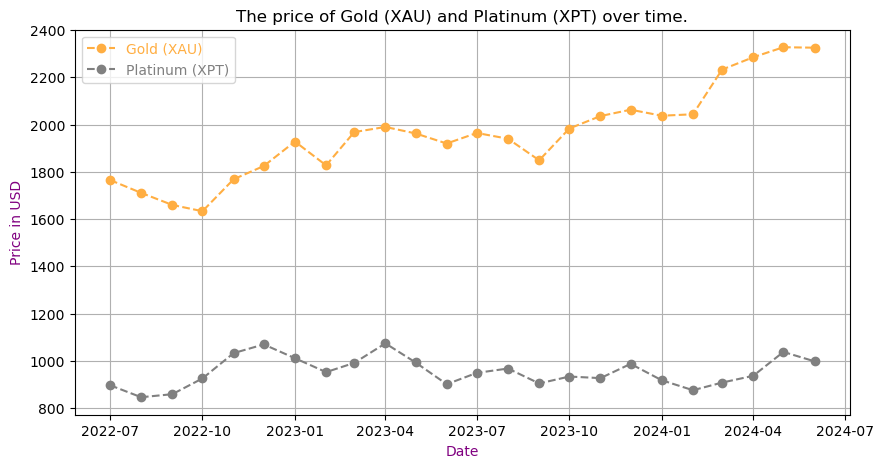

In [49]:
# We convert the 'date' columns to a datetime type.
xau_filtered['date'] = pd.to_datetime(xau_filtered['date'])
xpt_filtered['date'] = pd.to_datetime(xpt_filtered['date'])
# We sort the data by date.
xau_filtered = xau_filtered.sort_values('date')
xpt_filtered = xpt_filtered.sort_values('date')

# Visualization of prices over time.
plt.figure(figsize=(10, 5))
plt.plot(xau_filtered['date'], xau_filtered['xau_price'], marker='o', linestyle='--', color = '#FFAE42')
plt.plot(xpt_filtered['date'], xpt_filtered['xpt_price'], marker='o', linestyle='--', color = 'grey')

plt.title('The price of Gold (XAU) and Platinum (XPT) over time.')
plt.xlabel('Date', color = 'purple')
plt.ylabel('Price in USD', color = 'purple')

legend = plt.legend(['Gold (XAU)', 'Platinum (XPT)'], loc='upper left')
legend.texts[0].set_color('#FFAE42')
legend.texts[1].set_color('grey')

plt.grid(True)
plt.show()

Collecting **only all time series from July 2022 to June 2024** in one table. Percentages are converted to numbers and only data with a dollar value is taken. Not in millions or billions.

In [51]:
# Create a new empty table.
collected_data = pd.DataFrame(columns=[
    'cci',
    'cpi',
    'fed_funds',
    'unemployment',
    'trade_balance',
    'total_debt',
    'gold_price',
    'platinum_price',
    'gdp_approx'
])
# Add data to the columns.
collected_data['cci'] = filtered_cci['cci']
collected_data['cpi'] = cpi['cpi']
collected_data['fed_funds'] = fed_funds['fed_funds'] / 100 # /100 => From % to numbers.
collected_data['trade_balance'] = tb['trade_balance']
collected_data['total_debt'] = debt_real['total_debt']
collected_data['unemployment'] = unemployment['unemployment'] / 100 # /100 => From % to numbers.
collected_data['gold_price'] = xau_filtered['xau_price']
collected_data['platinum_price'] = xpt_filtered['xpt_price']
collected_data['gdp_approx'] = gdp_approx['gdp']

collected_data
# Show all data: _______ DataFrame (DF) with real data! _______

,cci,cpi,fed_funds,unemployment,trade_balance,total_debt,gold_price,platinum_price,gdp_approx
0,95.3,294.977,0.0168,0.035,-8.923600e+10,3.059511e+13,2324.98,998.00,2.599464e+13
1,103.6,295.209,0.0233,0.036,-8.678200e+10,3.093608e+13,2326.97,1037.70,2.613256e+13
2,107.8,296.341,0.0256,0.035,-9.001500e+10,3.092891e+13,2284.57,936.75,2.627048e+13
3,102.5,297.863,0.0308,0.036,-9.614500e+10,3.123830e+13,2232.38,908.05,2.640840e+13
4,101.4,298.648,0.0378,0.036,-8.397500e+10,3.141332e+13,2043.24,875.80,2.654347e+13
5,108.3,298.812,0.0410,0.035,-9.271100e+10,3.141969e+13,2037.19,917.91,2.667854e+13
6,106.0,300.356,0.0433,0.034,-9.125800e+10,3.145498e+13,2062.59,987.25,2.681360e+13
7,103.4,301.509,0.0457,0.036,-9.244400e+10,3.145929e+13,2035.75,926.93,2.689674e+13
8,104.0,301.744,0.0465,0.035,-8.314900e+10,3.145844e+13,1983.01,933.67,2.697988e+13
9,101.3,303.032,0.0483,0.034,-9.576600e+10,3.145782e+13,1848.58,904.46,2.706301e+13


### 3. **Analysis and Hypothesys testing**
#### 3.1 Stationarity
**Autocorrelation measures the dependence of time series on its own past values.** Examining autocorrelation is important for time series because it can reveal patterns, seasonality, and dependence in the data. In Python, we can use the statsmodels library to calculate and visualize the autocorrelation. Before analyzing autocorrelation, **it is useful to check that the time series is stationary**. We can use the Dickey-Fuller (ADF) test for this purpose. The code below will help us examine the autocorrelation of our time series and check if they are stationary, which is important for proper time series analysis and modeling. Comparing the graphs of the data, we choose <a style="color:purple;">**the most monotonic function: CPI**</a>.

#### Is there a statistically significant difference in the Consumer Price Index (CPI) over the time period under our study?
 - **$H_0$** : The **data has a unit root and is non-stationary** $\:\:$ ( **p-value > 0.05**: Fail to reject the null hypothesis (H0) ).
 - **$H_1$** : The **data does not have a unit root and is stationary** $\:\:$ ( **p-value <= 0.05**: Reject the null hypothesis (H0) ).
 - **$\\alpha = 0.05$**

Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure. If the time series is stationary, continue to the next steps. If the time series is not stationary, try differencing the time series and check its stationarity again. **[Time Series: Interpreting ACF and PACF](https://www.kaggle.com/code/iamleonie/time-series-interpreting-acf-and-pacf/notebook?scriptVersionId=80091228)** [13]

ADF Statistic: -1.2192149080973167
p-value: 0.6652758105336317
Critical Value (1%): -3.889265672705068
Critical Value (5%): -3.0543579727254224
Critical Value (10%): -2.66698384083045

 Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary. 



<Figure size 1000x600 with 0 Axes>

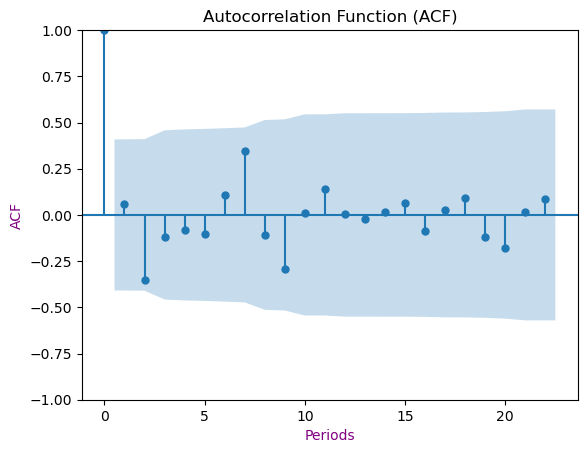

<Figure size 1000x600 with 0 Axes>

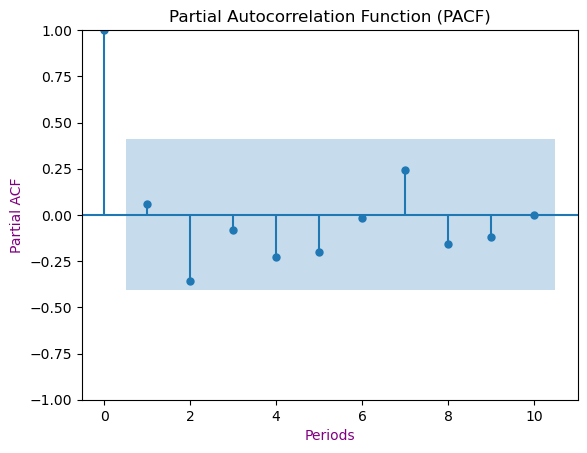

In [54]:
# We select the column we want to analyze (eg 'cci').
time_series = collected_data['cpi'].copy()
# Checking for stationarity with the ADF test.
result = adfuller(time_series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Value ({}): {}'.format(key, value))
    
# Differentiation of the time series: If the time series is not stationary, we can make it stationary by differentiation!
# time_series_diff = time_series.diff().dropna()
# If the time series is not stationary, differentiating the series!
if result[1] > 0.05:  # If the p-value is greater than 0.05, the series is not stationary.
    time_series = time_series.diff().dropna()

if result[1] > 0.05:
    print('\n Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary. \n')
else:
    print('\n Reject the null hypothesis (H0), the data does not have a unit root and is stationary. \n')

# Autocorrelation study (ACF)
plt.figure(figsize=(10, 6))
plot_acf(time_series, lags=22) # We want to see the autocorrelation for up to 22 lag periods.
plt.title('Autocorrelation Function (ACF)')
plt.xlabel("Periods", color = "purple")
plt.ylabel("ACF", color = "purple")
plt.show()

# Partial autocorrelation test (PACF)
plt.figure(figsize=(10, 6))
plot_pacf(time_series, lags=10) # The partial autocorrelation here works for up to 10 lag periods.
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel("Periods", color = "purple")
plt.ylabel("Partial ACF", color = "purple")
plt.show()

The **p-value** is much greater than 0.05, the line is <a style="color:purple;">**not stationary**</a>, therefore the other **time series share the same or similar characteristics**. <br>
Interpretation:
 - **Positive ACF**: A positive ACF at lag k indicates a positive correlation between the current observation and the observation at lag k.
 - **Negative ACF**: A negative ACF at lag k indicates a negative correlation between the current observation and the observation at lag k.
 - **Decay in ACF**: The decay in autocorrelation as lag increases often signifies the presence of a trend or seasonality in the time series.
 - **Significance**: Significant ACF values at certain lags may suggest potential patterns or relationships in the time series.
<br><br>
 - **Direct Relationship**: PACF isolates the direct correlation between the current observation and the observation at lag k, controlling for the influence of lags in between.
 - **AR Process Identification**: Peaks or significant values in PACF at specific lags can indicate potential orders for autoregressive (AR) terms in time series models.
 - **Modeling Considerations**: Analysts often examine PACF to guide the selection of lag orders in autoregressive integrated moving average (ARIMA) models. **[Autocorrelation and Partial Autocorrelation](https://www.geeksforgeeks.org/autocorrelation-and-partial-autocorrelation/)** [14]

The analysis of ACF and PACF will be done in the Conclusions section of the present study.<br>

For **better fundamental analysis, <a style="color:purple;">a combined approach involving several different methods</a> for detecting dependencies** is often used. For example:
 1. Using **mutual information** to initially detect **non-linear dependencies**.
 2. **Verification** of results with **Spearman** and **Kendall** correlations.
 3. **Regression analysis for deeper understanding** of relationships.

#### 3.2 Using mutual information to initially detect non-linear dependencies.
To study non-linear dependencies, we can use mutual information (**Mutual Information**), which measures dependencies between variables without being limited to linear relationships. Mutual Information is a measure that assesses the dependence between two variables. **It is not exactly a correlation, but rather a measure of how much information the two variables share**. This means that mutual information measures how much knowledge about one variable gives knowledge about another variable. In this context, mutual information between two variables **can detect non-linear relationships** that classical linear correlations (such as Pearson's) cannot detect. To visualize the results, we can use a heatmap.

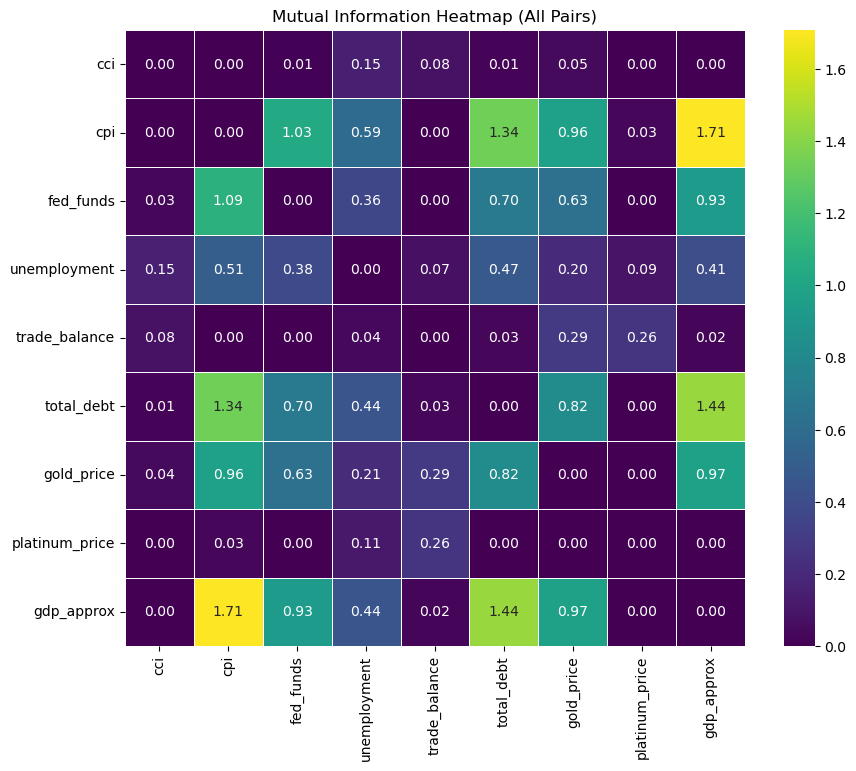

In [57]:
# Function for calculating the mutual information (mutual information) between columns in a DataFrame.
def calculate_mutual_info(df):
    # We create an empty DataFrame (my matrix) with an index and columns equal to the column names of the input DataFrame.
    mi_matrix = pd.DataFrame(index=df.columns, columns=df.columns)
    
    # An outer loop that loops through each column (col1) in the DataFrame.
    for col1 in df.columns:
        # An inner loop that loops through each column (col2) in the DataFrame.
        for col2 in df.columns:
            # We check if column col1 is not equal to column col2.
            if col1 != col2:
                # We calculate the mutual information between col1 and col2.
                mi_col1_col2 = mutual_info_regression(df[[col1]], df[col2])[0]
                
                # We calculate the mutual information between col2 and col1.
                mi_col2_col1 = mutual_info_regression(df[[col2]], df[col1])[0]
                
                # We calculate the average of the two measurements and record it in the matrix.
                mi_matrix.loc[col1, col2] = (mi_col1_col2 + mi_col2_col1) / 2
            else:
                # We set the diagonal elements (where col1 equals col2) to zero.
                # This is optional, but usually the mutual information between
                # a column is itself zero or insignificant.
                mi_matrix.loc[col1, col2] = 0  
    
    # We return the matrix of mutual information with data type float.
    return mi_matrix.astype(float)

# Calculate the mutual information between all columns.
mi_matrix = calculate_mutual_info(collected_data)

# Uses the seaborn library to create a heatmap.
# Each cell in the heatmap shows the mutual information value between the corresponding columns.
plt.close('all') # We make sure we close all previous shapes before creating the new heatmap.

# Visualization of mutual information with a heat map.
plt.figure(figsize=(10, 8))
sns.heatmap(mi_matrix, annot=True, cmap='viridis', fmt='.2f',  # Other customizations
            linewidths=0.5)  # Add border lines for better visibility.

# Customize title.
plt.title('Mutual Information Heatmap (All Pairs)')
plt.show()

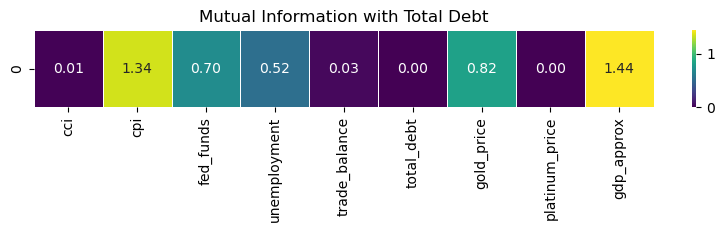

In [58]:
# Calculate the mutual information between each column and total_debt.
mi_gold_price = pd.Series(index=collected_data.columns)
for col in collected_data.columns:
    if col != 'total_debt':
        mi = mutual_info_regression(collected_data[[col]], collected_data['total_debt'])[0]
        mi_gold_price[col] = mi
    else:
        mi_gold_price[col] = 0

# Visualization of mutual information.
plt.figure(figsize=(10, 1))
sns.heatmap(mi_gold_price.to_frame().T, annot=True, fmt='.2f', cmap='viridis', cbar=True, linewidths=0.5)
plt.title('Mutual Information with Total Debt')
plt.show()

Here are the highlights of mutual information:
- **Values**: Mutual information is always non-negative. A value of 0 means that the two variables are completely independent. Larger values ​​indicate stronger dependence, but there is no upper limit.
- **Interpretation**: Higher mutual information values ​​mean greater dependence between variables. A value of **1.34**, for example, indicates that there is a significant relationship between **Total Debt** and **CPI**, although the exact interpretation of the value is not as straightforward as with correlation.<br>
- The analysis of Mutual Information will be given in the Conclusions section of the present study.

#### 3.3 Verification of results with Spearman and Kendall correlations.
 - **Spearman** Correlation: Used to measure monotonic dependencies (can detect non-linear monotonic relationships).
 - **Kendall's** Correlation: Estimates linear relationships.
 - The analysis of this correlations will be given in the Conclusions section of the present study.

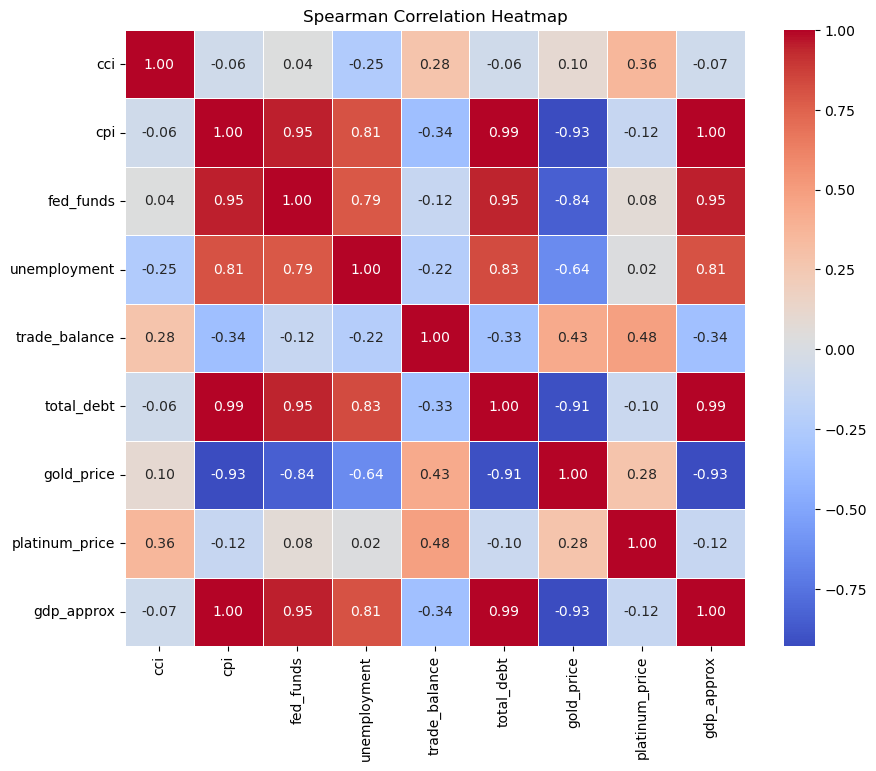

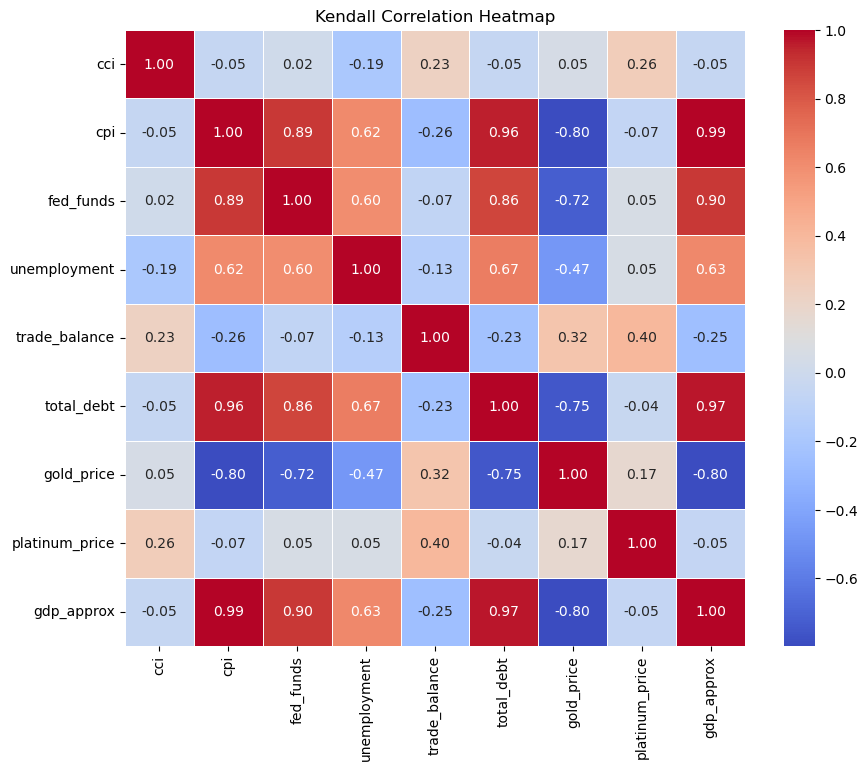

In [61]:
# Calculation of Spearman and Kendall correlations.
spearman_corr = collected_data.corr(method='spearman')
kendall_corr = collected_data.corr(method='kendall')

# Visualization of Spearman correlations.
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Spearman Correlation Heatmap')
plt.show()

# Visualization of Kendall correlations.
plt.figure(figsize=(10, 8))
sns.heatmap(kendall_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Kendall Correlation Heatmap')
plt.show()

#### 3.4 Regression analysis for deeper understanding of relationships.

Let's use **linear regression** to analyze the **relationship** between **gdp_approx**, **cpi** and **total_debt**. We assume that the relationship between the independent variables (in this case cpi and total_debt) and the dependent variable (gdp_approx) is linear. This means that the changes in the dependent variable are proportional to the changes in the independent variables.

Based on the proven strong relationship between CPI, DEBT and GDP, we can build a <a style="color:purple;">**model that predicts GDP**</a> using **CPI** and **DEBT** as input variables.

Mean Squared Error: 5.015412256027562e+21
R-squared: 0.9924703981731748


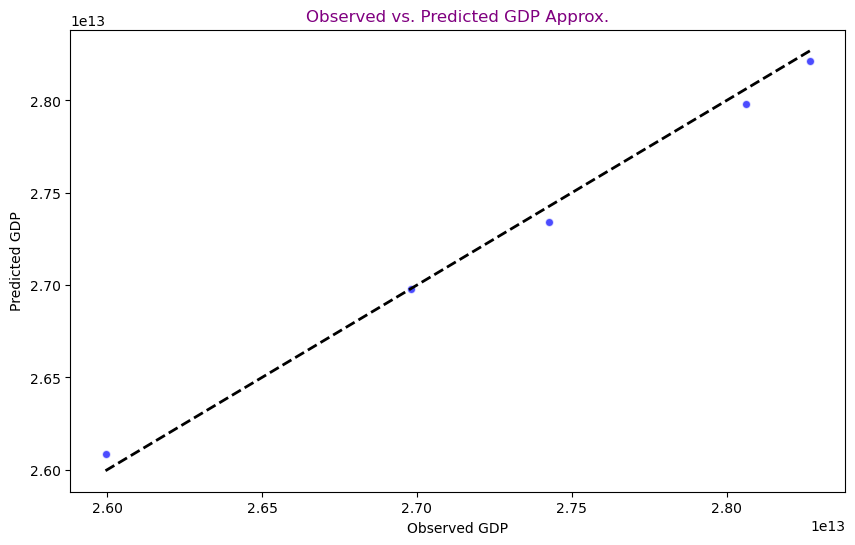

In [64]:
# Data preparation.
data_frame = pd.DataFrame(collected_data)

# We select the independent variables (features) and the dependent variable (target).
X = data_frame[['cpi', 'total_debt']]
y = data_frame['gdp_approx']

# We split the data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# We build and train the linear regression model.
model = LinearRegression()
# Training the model.
model.fit(X_train, y_train)

# We predict the values ​​of the test data.
y_pred = model.predict(X_test)

# We calculate the evaluation metrics.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# We display the results.
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Preview the results.
plt.figure(figsize = (10, 6))
plt.scatter(y_test, y_pred, color = 'blue', edgecolor = 'w', alpha = 0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 2)
plt.xlabel('Observed GDP')
plt.ylabel('Predicted GDP')
plt.title('Observed vs. Predicted GDP Approx.', color = 'purple')
plt.show()

**Mean Squared Error (MSE)**<br>
• MSE = 5.015412256027562e+21<br>
MSE measures the mean of the squared errors, where the errors are the differences between the predicted values ​​and the actual values. A lower MSE value indicates that the model is more accurate. In our case, the MSE is quite large, which is expected given the scale of the data (trillions for gdp_approx).

**R-squared ( ${R^2} = 1\; –\; {\frac{Unexplained\;Variation}{Total\;Variation}}$ )**<br>
• R-squared = 0.9924703981731748<br>
R-squared shows how much of the variation in the dependent variable (gdp_approx) can be explained by the independent variables (cpi and total_debt). The R-squared value is between 0 and 1:<br>
 - A value close to 1 means that the model explains a very large proportion of the variation.
 - A value close to 0 means that the model does not explain the variation well.

In our case, the R-squared is 0.9924703981731748, which is very close to 1. This indicates that the **model explains 99.24% of the variation in GDP based on the CPI and DEBT** variables. This is a very high score and indicates that the model has very good predictive ability.

The modeling analysis will be given in the section below.

### 4. **Conclusions**

1. Significant financial upheaval is potentially ahead of the financial world as **Saudi Arabia has decided not to renew its 50-year petro-dollar deal** (originally signed on 8 June 1974) with the United States. The deal, which expired on Sunday 9 June, was a cornerstone of the United States global economic dominance, [The Business Standard](https://www.tbsnews.net/world/global-economy/saudi-arabias-petro-dollar-exit-global-finance-paradigm-shift-875321) commented. [15] With the disappearance of the petro-dollar, it will be difficult to export inflation outside the US. But this fact will be reflected already outside the framework of our studied time interval.
2. When we look at the general graph of gold and platinum, we notice that platinum, being more of an industrial metal, has a price that does not fluctuate much over time. While gold, especially after September 2023, has a steady trend of price increase. This can lead us to think that **there is inflationary expectations in entire the world**, which can be confirmed by many articles like this one: [Gold Shines So Far in 2024 as Central Banks Invest Heavily](https://www.investopedia.com/gold-shines-so-far-in-2024-as-central-banks-invest-heavily-8672711). [16]
3. From the US spending survey for 2022 and 2023, we see the **five heaviest feathers**:
 - <a style="color:purple;">Department of Veterans Affairs. (**18.46%** for 2023)</a>
 - Department of Health and Human Services.
 - Social Security Administration.
 - <a style="color:purple;">Department of Defense. (**12.73%** for 2023)</a>
 - <a style="color:purple;">Interest on Treasury Securities held by the public. (**8.60%** for 2023)</a>

From the graphs depicting the US budget, we see that **these 5 categories are far ahead of all others**.
Of these, only two (the Department of Health and Human Services and the Social Security Administration) contribute to the welfare of the USA. Much of the spending is on wars and their consequences (Department of Veterans Affairs). A significant part of the budget also goes to pay interest on government loans. **The feathers of the budget that make a competitive economy with good infrastructure are poorly funded or with very symbolic funding**. Such as:
 - Small Business Administration.
 - <a style="color:purple;">National Science Foundation. (**0.11%** for 2023)</a>
 - Environmental Protection Agency.
 - <a style="color:purple;">Department of Transportation. (**1.35%** for 2023)</a>
 - <a style="color:purple;">Department of Energy. (**0.95%** for 2023)</a>
 - <a style="color:purple;">Department of Education. (**0.23%** for 2023)</a>
 - Department of Agriculture.

Looking at the distribution of the funds of the US budget (which is mainly filled not by production, but by services), we does not see good prospects in the future. It is not invested in the development of the USA, but in wars, their consequences and interest on the loans taken.

4. The analysis of **ACF** and **PACF**:
 - The ACF chart is too short to see any discernible trend. It looks like a random distribution. There is some decay and we can assume that there is some weak trend.
 - The PACF graph is even shorter and definitely cannot be deduced from it or find any pattern of behavior.

5. The analysis of **Mutual Information**:
 - From the Mutual Information Heatmap, we see that there is a strong dependence between **Total Debt** and **CPI**,<br>**Total Debt** and **GDP**, and especially between **GDP** and **CPI**.
 - Mutual Information is a measure that assesses the dependence between two variables. Rather a measure of<br>how much information the two variables share.
 - From this we can conclude that the <a style="color:purple;">**growth of the US economy is mainly affected by inflation and the accumulation of more debt**</a>.

6. The analysis of **Spearman and Kendall correlations**:
 - Let us first consider **Kendall's** linear correlation dependences:
    - The price of **GOLD** has a negative correlation with all the important categories listed below.
    - **CPI** has a strong positive correlation with FED FUNDS, DEBT and especially with GDP (+0.99).
    - **UNEMPLOYMENT** has a positive correlation with DEBT.
    - **DEBT** has a strong positive correlation with FED FUNDS, CPI and GDP.
    - **GDP** has a strong positive correlation with DEBT, CPI and FED FUNDS.
 - Now let's look at non-linear **Spearman** correlations:
   - Here we will **only** mention the **differences with Kendall** ie. where there are<br>still nonlinear dependencies found.
   - The price of **GOLD** has again a negative correlation with all the important categories listed below.<br>We would explain this by the fact that gold is "independent money" and does not fit<br>into the "debt vs. development" game.
   - All other correlations noted in Kendall **here only deepen their correlation**. This is easily tracked through the odds.
 - This again confirms the last thesis from item 5:<br>**Growth of the US economy** is mainly affected by **inflation** and the accumulation of **more debt**.

7. The visualization of the **regression analysis** gives a real insight into the accuracy of the model. R-squared = 0.99247 is a very high score and indicates that the model has very good predictive ability. The selected linear regression model is very good for **predicting GDP based on CPI and DEBT**. This again proves their very close dependence.

8. The main weight of the US budget mainly goes to military purposes and the consequences of wars. The share of interest payments on borrowed loans is also very large. The almost direct linear dependence of the expansion of the economy on inflation (printing money) and borrowing was also shown. The latter, since the dollar is a world currency, means printing money again. As a result of all that has been said so far, we can safely summarize that the <a style="color:purple;">**The American economy is almost narcotically addicted to printing new money.**</a> The trade balance is strongly negative with a worsening trend. Science is not a priority. **If for some reason the printing of new money stops**, or the dollars of the world go "home" to the USA, **we are waiting for "Great Depression - 2"**.<br>How serious is the problem? Let's see it in a picture from the [US Debt Clock](https://usdebtclock.org/) website. [17] The date is: 

![US DEBT CLOCK](us_debt_clock.png)

<br>**US NATIONAL DEBT** = **.....** USD (Source: US TREASURY) No!
<br>**US TOTAL DEBT** = **.....** USD (Source: FEDERAL RESERVE) Maybe...<br>
**US UNFUNDED LIABILITIES** = **.....** USD (Source: US TREASURY) Cheers!<br>

To be continued...

### Resources:
1. **Importance of Economic Indicators**: https://www.fxcc.com/eu/major-economic-indicators
2. **statista - Global inflation rate from 2000 to 2022**: https://www.statista.com/statistics/256598/global-inflation-rate-compared-to-previous-year/
3. **FEDERAL RESERVE BANK of ST. LOUIS**: https://fred.stlouisfed.org/series/GDP
4. **FEDERAL RESERVE BANK of ST. LOUIS**: https://fred.stlouisfed.org/series/CPIAUCSL
5. **United States Conference Board Consumer Confidence**: https://macrovar.com/united-states/consumer-confidence-index/
6. **FEDERAL RESERVE BANK of ST. LOUIS**: https://fred.stlouisfed.org/series/FEDFUNDS
7. **FEDERAL RESERVE BANK of ST. LOUIS**: https://fred.stlouisfed.org/series/BOPGTB
8. **FiscalData**: https://fiscaldata.treasury.gov/datasets/monthly-statement-public-debt/summary-of-treasury-securities-outstanding
9. **FEDERAL RESERVE BANK of ST. LOUIS**: https://fred.stlouisfed.org/series/LRHUTTTTUSM156S
10. **FiscalData**: https://fiscaldata.treasury.gov/datasets/u-s-government-financial-report/statements-of-net-cost)
11. **investing.com**: https://www.investing.com/currencies/xau-usd-historical-data
12. **investing.com**: https://www.investing.com/currencies/xpt-usd-historical-data
13. **Time Series: Interpreting ACF and PACF**: https://www.kaggle.com/code/iamleonie/time-series-interpreting-acf-and-pacf/notebook?scriptVersionId=80091228
14. **Autocorrelation and Partial Autocorrelation**: https://www.geeksforgeeks.org/autocorrelation-and-partial-autocorrelation/
15. **Business Standard - Saudi Arabia's petro-dollar exit**: https://www.tbsnews.net/world/global-economy/saudi-arabias-petro-dollar-exit-global-finance-paradigm-shift-875321
16. **Gold Shines So Far in 2024 as Central Banks Invest Heavily**: https://www.investopedia.com/gold-shines-so-far-in-2024-as-central-banks-invest-heavily-8672711
17. **US Debt Clock**: https://usdebtclock.org/